In [ ]:
# HW Module 2
# mchepelva
#

In [ ]:
# Load the Mice dataset from the folowing location: 'http://edu.modas.lu/data/txt/mice.txt'.

The dataset contains some missing values. Remove the observations (rows) with NaN values 
    (hint: pandas.DataFrame.dropna).

 Extract the labels (sex) and features (starting age, ending age, starting weight, ending weight, weight change, 
        bleeding time, ionized Ca in blood, blood pH, bone mineral density, lean tissues weight and fat weight) 
from the Mice dataset.

 Convert categorical labels to numerical (hint: sklearn.preprocessing.LabelEncoder).

 Divide the data into training and test subsets in 75:25 ratio (hint: sklearn.model_selection.train_test_split).

 Scale the data so that the mean of each feature equals zero and standard deviation equals one (hint: sklearn.preprocessing.StandardScaler).

 Train logistic regression classifier using the training dataset and predict the labels using the test dataset.

 Calculate and print classification accuracy (hint: sklearn.metrics.accuracy_score).

 Plot confusion matrix and ROC curve (hint: sklearn.metrics.[roc_auc_score,roc_curve,confusion_matrix]).

 Repeat training and evaluation steps without scaling the features and analyse the obtained results.

In [79]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
mice = pd.read_csv('http://edu.modas.lu/data/txt/mice.txt', delimiter='\t', index_col=None) 
mice.head()

,ID,Strain,Sex,Starting age,Ending age,Starting weight,Ending weight,Weight change,Bleeding time,Ionized Ca in blood,Blood pH,Bone mineral density,Lean tissues weight,Fat weight
0,1,129S1/SvImJ,f,66,116.0,19.3,20.5,1.062,64.0,1.20,7.24,0.0605,14.5,4.4
1,2,129S1/SvImJ,f,66,116.0,19.1,20.8,1.089,78.0,1.15,7.27,0.0553,13.9,4.4
2,3,129S1/SvImJ,f,66,108.0,17.9,19.8,1.106,90.0,1.16,7.26,0.0546,13.8,2.9
3,368,129S1/SvImJ,f,72,114.0,18.3,21.0,1.148,65.0,1.26,7.22,0.0599,15.4,4.2
4,369,129S1/SvImJ,f,72,115.0,20.2,21.9,1.084,55.0,1.23,7.30,0.0623,15.6,4.3


In [81]:
# missing values
print(mice.isna().sum())
df = mice.dropna(axis=0)

ID                       0
Strain                   0
Sex                      0
Starting age             0
Ending age               2
Starting weight          0
Ending weight            0
Weight change            0
Bleeding time           30
Ionized Ca in blood      2
Blood pH                 2
Bone mineral density     3
Lean tissues weight      3
Fat weight               3
dtype: int64


In [82]:
# subset cols
df = df.loc[:, 'Sex':'Fat weight']

# Encode categorical
label_encoder = LabelEncoder()
unique_labels = label_encoder.fit(df['Sex']).classes_ # store unique labels for plotting
df['IS_MALE'] = label_encoder.fit_transform(df['Sex'])
df = df.drop(columns = 'Sex')
print(label_encoder.classes_)
df.head()

['f' 'm']


,Starting age,Ending age,Starting weight,Ending weight,Weight change,Bleeding time,Ionized Ca in blood,Blood pH,Bone mineral density,Lean tissues weight,Fat weight,IS_MALE
0,66,116.0,19.3,20.5,1.062,64.0,1.20,7.24,0.0605,14.5,4.4,0
1,66,116.0,19.1,20.8,1.089,78.0,1.15,7.27,0.0553,13.9,4.4,0
2,66,108.0,17.9,19.8,1.106,90.0,1.16,7.26,0.0546,13.8,2.9,0
3,72,114.0,18.3,21.0,1.148,65.0,1.26,7.22,0.0599,15.4,4.2,0
4,72,115.0,20.2,21.9,1.084,55.0,1.23,7.30,0.0623,15.6,4.3,0


In [83]:
df.shape[1]

12

In [84]:
# Train / test subsets of df (here I tried to store X and y together but then felt all inconvenience of this decision)
df_train, df_test = train_test_split(df, test_size=0.25)
df_train.shape

(569, 12)

In [85]:
sc = StandardScaler()
X_train_std = sc.fit_transform(df_train.iloc[:,:(df_train.shape[1]-1)])
# Use same scaling for test features
X_test_std = sc.transform(df_test.iloc[:,:(df_test.shape[1]-1)])

In [86]:
# Fit the model
model = LogisticRegression(max_iter=5000, solver='newton-cg', penalty='l2')

model.fit(X_train_std, df_train.loc[:,"IS_MALE"])
    
# Predict labels on a test dataset
y_pred = model.predict(X_test_std)
    
# Calculate classification accuracy
acc = accuracy_score(df_test.loc[:,"IS_MALE"], y_pred)
print("\nAccuracy: %.2f" % (acc))


Accuracy: 0.76


In [87]:
model.fit(df_train.iloc[:,:(df_train.shape[1]-1)], df_train.loc[:,"IS_MALE"])
y_pred_ns = model.predict(df_test.iloc[:,:(df_test.shape[1]-1)])
acc_notstd =  accuracy_score(df_test.loc[:,"IS_MALE"], y_pred_ns)
print('Accuracy without standartization: %.2f' % acc_notstd)

Accuracy without standartization: 0.73


In [88]:
def plot_conf_mat(conf_mat, unique_labels):
    """
    Plot confusion matrix
     
    Parameters
    ----------
    conf_mat : confusion matrix 
    unique_labels : unique labels
    """
    
    # Calculate the counts and percentages for the confusion matrix
    counts = ["{count:d}".format(count=value) for value in conf_mat.flatten()]
    percentages = ["{perc:.2%}".format(perc=value) for value in conf_mat.flatten()/np.sum(conf_mat)]
    
    # Prepare labels for the confusion matrix
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(counts, percentages)]
    labels = np.asarray(labels).reshape(int(np.sqrt(len(labels))), int(np.sqrt(len(labels))))
    
    # Plot confusion matrix
    plt.figure()
    ax = sns.heatmap(conf_mat, annot=labels, cmap='Blues', fmt='')
    ax.set_xlabel('\nPredicted values')
    ax.set_ylabel('Actual values');
    
    # Annotations
    ax.xaxis.set_ticklabels(unique_labels, rotation=0)
    ax.yaxis.set_ticklabels(unique_labels, rotation=0)
    
    # Display the confusion matrix
    plt.show()

In [89]:
def plot_ROC(y_test, y_pred_proba):
    """
    Plot receiver operating characteristic (ROC) curve
     
    Parameters
    ----------
    y_test : ground truth labels  
    y_test_proba: predicted probabilistic labels
    """
    
    # Calculate AUC ROC score
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Compute Receiver operating characteristic (ROC), i.e. FPR and TPR for different thresholds
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)    
    
    # Plot ROC curve
    plt.plot(fpr, tpr, 'b', label='$AUC=$'+ '%.2f' % auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.rc('axes', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()  

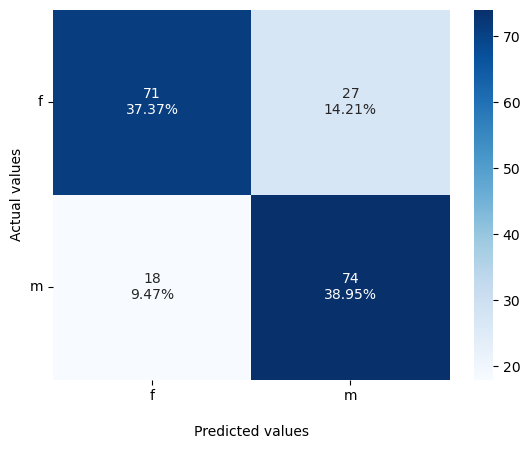

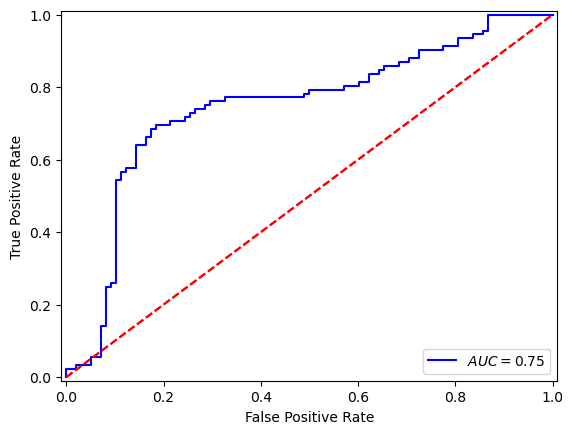

In [90]:
# Plot confusion matrix
plot_conf_mat(confusion_matrix(df_test.loc[:,"IS_MALE"], y_pred), unique_labels)  

# Predict probabilistic labels for AUC calculation
y_pred_proba = model.predict_proba(df_test.iloc[:,:(df_test.shape[1]-1)])[:, 1]
# Plot ROC curve
plot_ROC(df_test.loc[:,"IS_MALE"], y_pred_proba)